In [2]:
import copy
import matplotlib.pyplot as plt
import numpy as np

from pycrysfml import cfml_utilities

In [3]:
STUDY_DICT = {
  "phases": [
    {
      "SrTiO3": {
        "_space_group_name_H-M_alt": "P m -3 m",
        "_cell_length_a": 3.9,
        "_cell_length_b": 3.9,
        "_cell_length_c": 3.9,
        "_cell_angle_alpha": 90,
        "_cell_angle_beta": 90,
        "_cell_angle_gamma": 90,
        "_atom_site": [
          {
            "_label": "Sr",
            "_type_symbol": "Sr",
            "_fract_x": 0.5,
            "_fract_y": 0.5,
            "_fract_z": 0.5,
            "_occupancy": 1,
            "_adp_type": "Biso",
            "_B_iso_or_equiv": 0.40
          },
          {
            "_label": "Ti",
            "_type_symbol": "Ti",
            "_fract_x": 0,
            "_fract_y": 0,
            "_fract_z": 0,
            "_occupancy": 1,
            "_adp_type": "Biso",
            "_B_iso_or_equiv": 0.50
          },
          {
            "_label": "O",
            "_type_symbol": "O",
            "_fract_x": 0.5,
            "_fract_y": 0,
            "_fract_z": 0,
            "_occupancy": 1,
            "_adp_type": "Biso",
            "_B_iso_or_equiv": 0.65
          }
        ]
      }
    }
  ],
  "experiments": [
    {
      "NPD": {
        "_diffrn_source": "nuclear reactor",
        "_diffrn_radiation_probe": "neutron",
        "_diffrn_radiation_wavelength": 1.27,
        "_pd_instr_resolution_u": 0.02,
        "_pd_instr_resolution_v": -0.02,
        "_pd_instr_resolution_w": 0.12,
        "_pd_instr_resolution_x": 0.0015,
        "_pd_instr_resolution_y": 0,
        "_pd_instr_reflex_asymmetry_p1": 0,
        "_pd_instr_reflex_asymmetry_p2": 0,
        "_pd_instr_reflex_asymmetry_p3": 0,
        "_pd_instr_reflex_asymmetry_p4": 0,
        "_pd_meas_2theta_offset": 0,
        "_pd_meas_2theta_range_min": 1,
        "_pd_meas_2theta_range_max": 140,
        "_pd_meas_2theta_range_inc": 0.05
      }
    }
  ]
}

In [4]:
# Help functions

def generated_x_array(study_dict:dict):
    experiment = study_dict['experiments'][0]['NPD']
    start = experiment['_pd_meas_2theta_range_min']
    stop = experiment['_pd_meas_2theta_range_max']
    step = experiment['_pd_meas_2theta_range_inc']
    x = np.arange(start=start, stop=stop+step, step=step)
    return x

def compute_pattern(study_dict:dict):
    _, y = cfml_utilities.powder_pattern_from_json(study_dict)  # returns x and y arrays
    y = y.astype(np.float64)
    return y

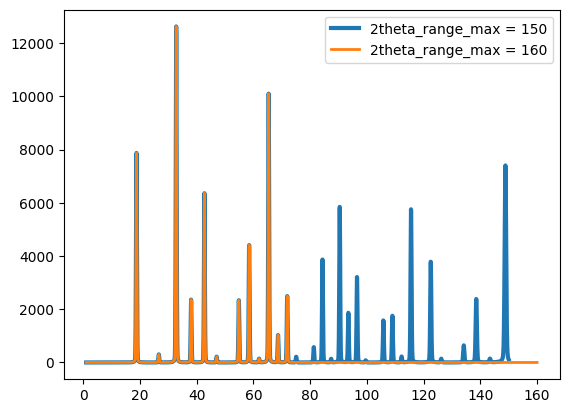

In [5]:
study_dict = copy.deepcopy(STUDY_DICT)

# set upper limit to 140deg
study_dict['experiments'][0]['NPD']['_pd_meas_2theta_range_max'] = 150.0
x_1 = generated_x_array(study_dict)
y_1 = compute_pattern(study_dict)

# set upper limit to 160deg
study_dict['experiments'][0]['NPD']['_pd_meas_2theta_range_max'] = 160.0
x_2 = generated_x_array(study_dict)
y_2 = compute_pattern(study_dict)

# plot results§
plt.plot(x_1, y_1, '-', linewidth=3)
plt.plot(x_2, y_2, '-', linewidth=2)
plt.legend(["2theta_range_max = 150", "2theta_range_max = 160"])
plt.show()